In [12]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Load the dataset
data_path = "sweetspot_optimized.csv"
df = pd.read_csv(data_path)

In [13]:
# Handling Facies Data
df['Facies'] = df[['Facies_1', 'Facies_2', 'Facies_3', 'Facies_4', 'Facies_5']].idxmax(axis=1)

# Impute missing values for clustering
feature_cols = ['POROS', 'KX', 'KY', 'TD(MD)', 'Pressure_Drawdown', 'Co [MSTB]', 'OGR', 'Cw (bbl)']
imputer = SimpleImputer(strategy="mean")
df_imputed = df.copy()
df_imputed[feature_cols] = imputer.fit_transform(df[feature_cols])

# Clustering Facies using K-Means
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_imputed['Cluster_Facies'] = kmeans.fit_predict(df_imputed[feature_cols])

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df_imputed, geometry=gpd.points_from_xy(df_imputed['Bottomhole X'], df_imputed['Bottomhole Y']))


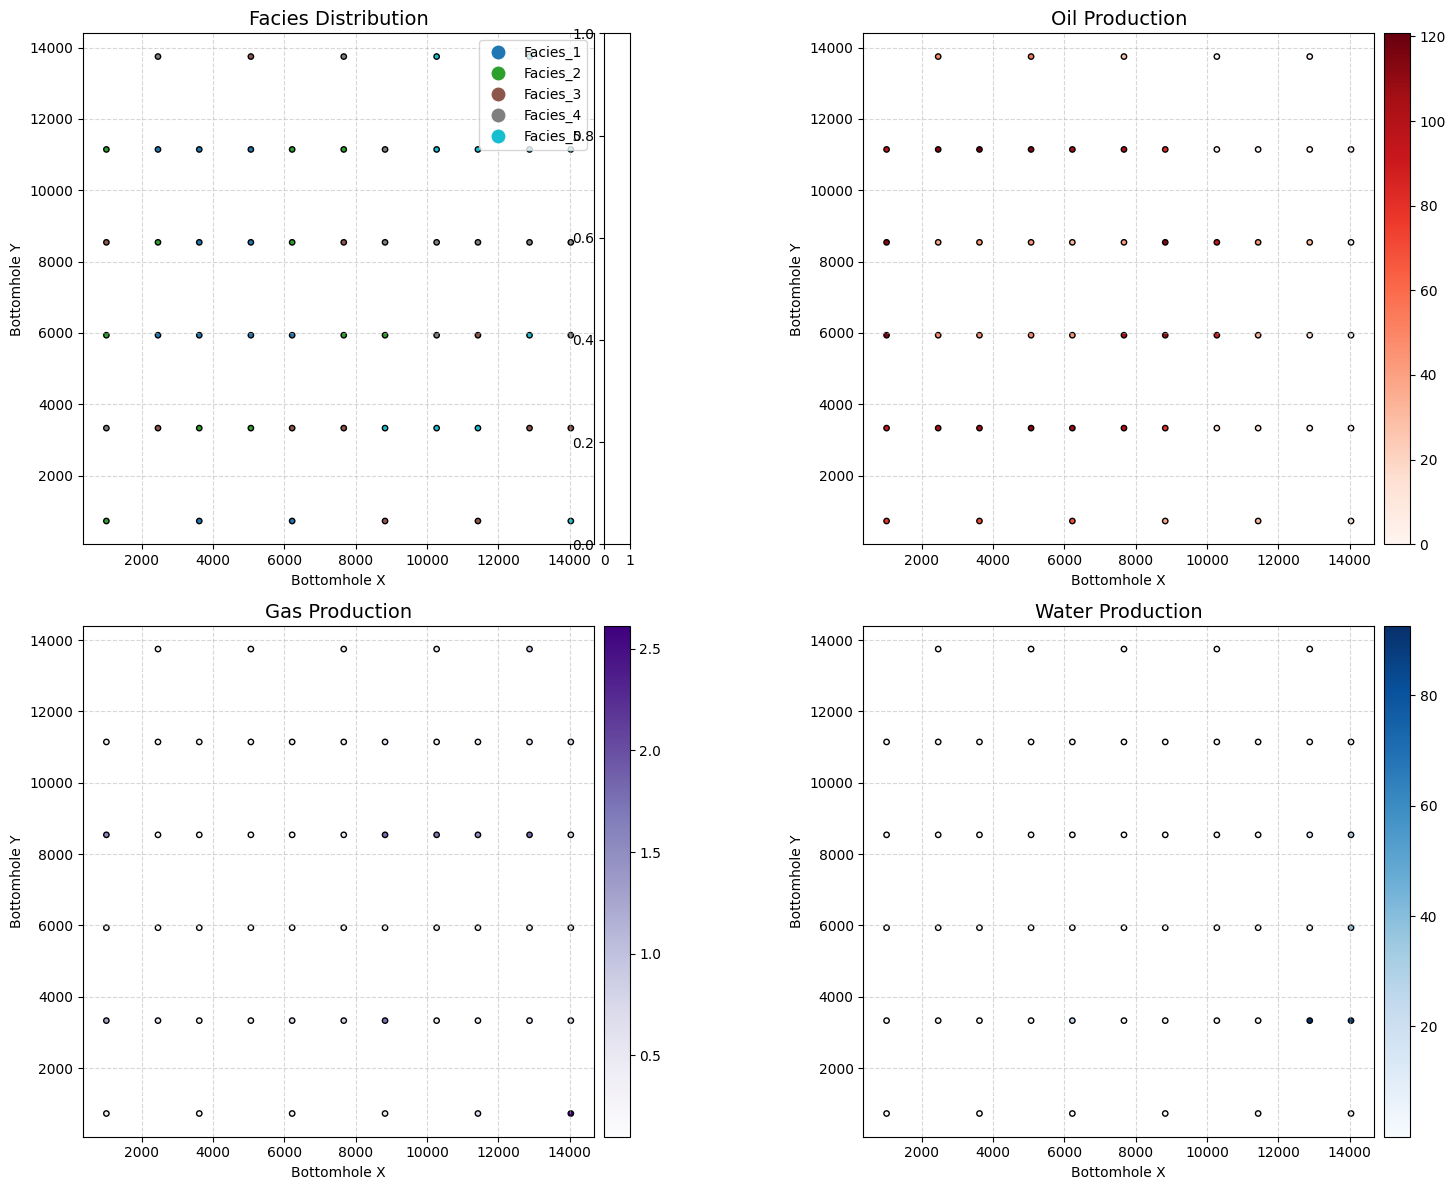

In [14]:
# Create enhanced spatial visualizations with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
features_to_plot = ['Facies', 'Co [MSTB]', 'OGR', 'Cw (bbl)']
titles = ['Facies Distribution', 'Oil Production', 'Gas Production', 'Water Production']
cmaps = ['tab10', 'Reds', 'Purples', 'Blues']

for i, (feature, title, cmap) in enumerate(zip(features_to_plot, titles, cmaps)):
    ax = axes[i // 2, i % 2]
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    gdf.plot(column=feature, cmap=cmap, legend=True, ax=ax, cax=cax, markersize=15, edgecolor='black')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Bottomhole X")
    ax.set_ylabel("Bottomhole Y")
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

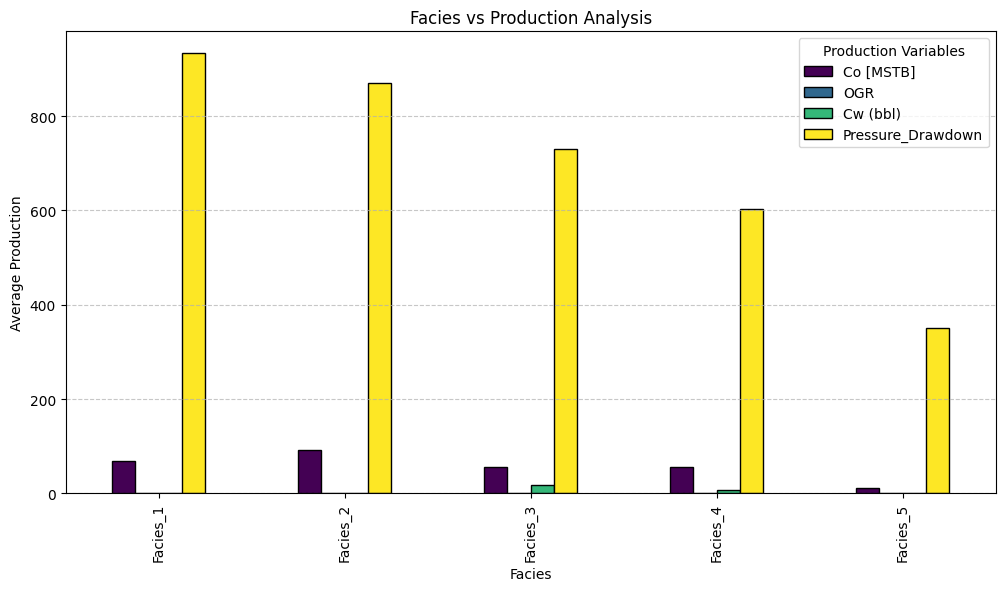

          Co [MSTB]       OGR   Cw (bbl)  Pressure_Drawdown
Facies                                                     
Facies_1  69.567245  0.177604   0.000396         933.141682
Facies_2  91.244882  0.321563   0.000278         870.135826
Facies_3  56.611010  0.636275  18.378479         729.643961
Facies_4  56.709905  1.007390   7.160921         602.035565
Facies_5  11.651019  0.822523   0.286776         350.232506


In [8]:
# Facies vs Production Analysis with Better Visualization
facies_production = df_imputed.groupby('Facies')[['Co [MSTB]', 'OGR', 'Cw (bbl)', 'Pressure_Drawdown']].mean()
facies_production.plot(kind='bar', figsize=(12, 6), colormap='viridis', edgecolor='black')
plt.title("Facies vs Production Analysis")
plt.xlabel("Facies")
plt.ylabel("Average Production")
plt.legend(title="Production Variables")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(facies_production)